<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline (Version 1.0): 2020-12-03 17:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import norm
from scipy import stats

from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [2]:
df = pd.read_csv('imports_85.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.columns = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
lst_object = [x for x in df.columns if df[x].dtypes == 'object']
lst_object

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'price']

In [7]:
df[lst_object].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,boreratio,stroke,horsepower,peakrpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450


# Data exploration

### 1.1 Object Variable

In [8]:
lst_var_numeric = ['symboling','boreratio','stroke','horsepower','peakrpm','price']

In [9]:
lst_var_numeric = ['symboling','boreratio','stroke','horsepower','peakrpm','price']
df[lst_var_numeric] = df[lst_var_numeric].replace('?',np.nan)
for x in lst_var_numeric:
    print(x,'-',df[x][df[x].str.isnumeric() == False].unique())
    df[x] = pd.to_numeric(df[x])
print('*'*40)
print('Convert to Numeric Variable Suceessed !')

symboling - []
boreratio - ['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.60' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '3.39' '3.76'
 '3.58' '3.46' '3.80' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.70'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
stroke - ['2.68' '3.47' '3.40' '2.80' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46'
 '3.90' '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' '3.16' '3.64' '3.10'
 '3.35' '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.90' '2.07'
 '2.36' '2.64' '3.08' '3.50' '3.54' '2.87']
horsepower - []
peakrpm - []
price - []
****************************************
Convert to Numeric Variable Suceessed !


In [10]:
df[lst_var_numeric].head()

,symboling,boreratio,stroke,horsepower,peakrpm,price
0,NaN,3.47,2.68,111.0,5000.0,13495.0
1,NaN,3.47,2.68,111.0,5000.0,16500.0
2,NaN,2.68,3.47,154.0,5000.0,16500.0
3,164.0,3.19,3.40,102.0,5500.0,13950.0
4,164.0,3.19,3.40,115.0,5500.0,17450.0


1.2 Int Variable

In [11]:
lst_int = [x for x in df.columns if df[x].dtypes == 'int64']
lst_int

['car_ID', 'curbweight', 'enginesize', 'citympg', 'highwaympg']

In [12]:
for x in lst_int:
    print(x,'-',len(df[x].unique()), df[x].unique() if len(df[x].unique())<10 else '')

car_ID - 6 [ 3  1  2  0 -1 -2]
curbweight - 171 
enginesize - 44 
citympg - 29 
highwaympg - 30 


In [13]:
lst_int.remove('car_ID')

In [14]:
lst_float = [x for x in df.columns if df[x].dtypes == 'float64']
lst_float

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'price']

In [15]:
def remove_duplicates(l):
    return list(set(l))

In [16]:
lst_numeric = lst_float + lst_var_numeric + lst_int
lst_numeric = remove_duplicates(lst_numeric)
len(lst_numeric)

15

In [17]:
# Fill na with Median, because Mean = Median

In [18]:
lst_column_nan_values = df.isna().sum()
lst_column_nan_values = lst_column_nan_values[lst_column_nan_values.values>0].index
lst_column_nan_values
for i in lst_column_nan_values:
    df[i] = df[i].fillna(df[i].median())

In [19]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

# 1.2 Explore Categorical Variable

In [20]:
lst_object_ = [x for x in df.columns if df[x].dtypes == 'object']
lst_object_

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [21]:
df[lst_object_]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [22]:
df[lst_numeric]

,highwaympg,carwidth,carlength,enginesize,compressionratio,boreratio,horsepower,symboling,wheelbase,stroke,curbweight,peakrpm,carheight,citympg,price
0,27,64.1,168.8,130,9.0,3.47,111.0,115.0,88.6,2.68,2548,5000.0,48.8,21,13495.0
1,27,64.1,168.8,130,9.0,3.47,111.0,115.0,88.6,2.68,2548,5000.0,48.8,21,16500.0
2,26,65.5,171.2,152,9.0,2.68,154.0,115.0,94.5,3.47,2823,5000.0,52.4,19,16500.0
3,30,66.2,176.6,109,10.0,3.19,102.0,164.0,99.8,3.40,2337,5500.0,54.3,24,13950.0
4,22,66.4,176.6,136,8.0,3.19,115.0,164.0,99.4,3.40,2824,5500.0,54.3,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,28,68.9,188.8,141,9.5,3.78,114.0,95.0,109.1,3.15,2952,5400.0,55.5,23,16845.0
201,25,68.8,188.8,141,8.7,3.78,160.0,95.0,109.1,3.15,3049,5300.0,55.5,19,19045.0
202,23,68.9,188.8,173,8.8,3.58,134.0,95.0,109.1,2.87,3012,5500.0,55.5,18,21485.0
203,27,68.9,188.8,145,23.0,3.01,106.0,95.0,109.1,3.40,3217,4800.0,55.5,26,22470.0


In [23]:
lst_object_.append('car_ID')
lst_object_

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_ID']

In [24]:
lst_numeric

['highwaympg',
 'carwidth',
 'carlength',
 'enginesize',
 'compressionratio',
 'boreratio',
 'horsepower',
 'symboling',
 'wheelbase',
 'stroke',
 'curbweight',
 'peakrpm',
 'carheight',
 'citympg',
 'price']

In [25]:
len(lst_object_) + len(lst_numeric) # Đủ 26 biến

26

In [26]:
def Cat_Analysis(e,df):
    print(df[e].value_counts())
    df[e].value_counts().plot.pie()
    plt.show()

1. CarName - Unique values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] - Analysis
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: CarName, dtype: int64


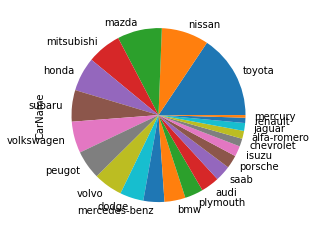

****************************************
2. fueltype - Unique values: ['gas' 'diesel'] - Analysis
gas       185
diesel     20
Name: fueltype, dtype: int64


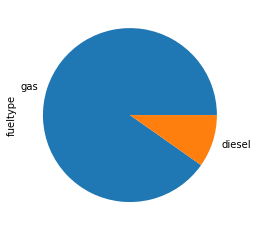

****************************************
3. aspiration - Unique values: ['std' 'turbo'] - Analysis
std      168
turbo     37
Name: aspiration, dtype: int64


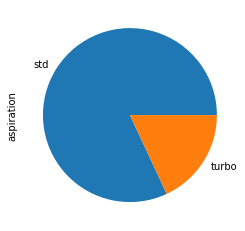

****************************************
4. doornumber - Unique values: ['two' 'four' '?'] - Analysis
four    114
two      89
?         2
Name: doornumber, dtype: int64


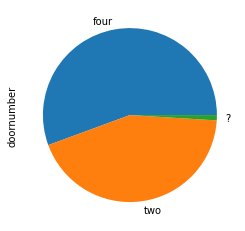

****************************************
5. carbody - Unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] - Analysis
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


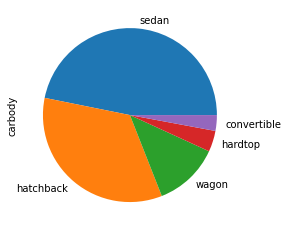

****************************************
6. drivewheel - Unique values: ['rwd' 'fwd' '4wd'] - Analysis
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


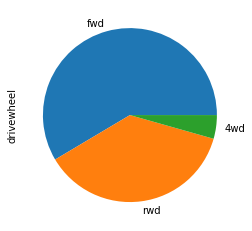

****************************************
7. enginelocation - Unique values: ['front' 'rear'] - Analysis
front    202
rear       3
Name: enginelocation, dtype: int64


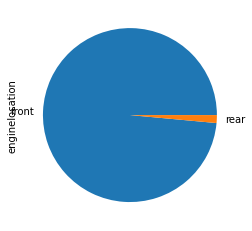

****************************************
8. enginetype - Unique values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] - Analysis
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


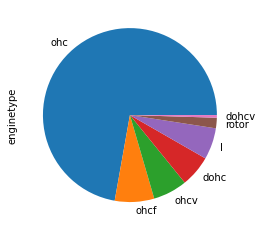

****************************************
9. cylindernumber - Unique values: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] - Analysis
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


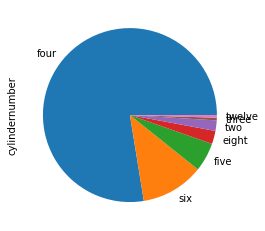

****************************************
10. fuelsystem - Unique values: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] - Analysis
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


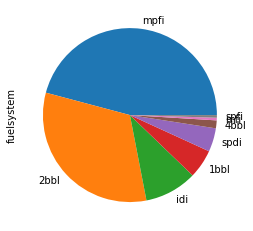

****************************************
11. car_ID - Unique values: [ 3  1  2  0 -1 -2] - Analysis
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: car_ID, dtype: int64


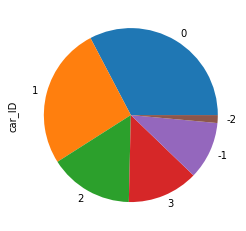

****************************************


In [27]:
c=1
for x in lst_object_:
    print(f'{c}. {x} - Unique values: {df[x].unique()} - Analysis')
    Cat_Analysis(x,df)
    print('*'*40)
    c+=1

## 2. Univariate Analysis 

In [28]:
def Univariate_Analysis(e,df):
    print(df[e].describe(include='all'))
    print("Unique values",e,":\t",len(df[e].unique()))
    print('Median',e,":",df[e].median())
    print('Mode',e,":", df[e].mode().values[0])
    print('Var',e,":",df[e].var())
    print('Std',e,":",df[e].std())
    print('Skew:', df[e].skew())
    print('Kurtosis:', df[e].kurtosis())
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[e])
    plt.subplot(1,2,2)
    plt.hist(df[e])
    plt.show()

In [29]:
def Present_Outlier_Zscore(e,df):
    df = df.reset_index(drop=True)
    number_Z_score = stats.zscore(df[e])
    M = np.mean(df[e])
    std = np.std(df[e])
    low = M - 1.96*std
    high = M + 1.96*std
    outliers = df[e][(df[e]<low) | (df[e]>high)]
    percent = outliers.size/(df[e].shape[0])
    return percent,low,high

def Present_Outlier_IQR(e,df):
    df = df.reset_index(drop=True)
    Q1 = np.percentile(df[e],25)
    Q3 = np.percentile(df[e],75)
    IQR = stats.iqr(df[e])
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    outliers = df[e][(df[e]<low) | (df[e]>high)]
    percent = outliers.size/(df[e].shape[0])
    plt.figure(figsize=(4,8))
    sns.boxplot(df[e])
    plt.title('Boxplot for '+ e)
    plt.show()
    print('*'*40)
    return percent,low,high

1. highwaympg
count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64
Unique values highwaympg :	 30
Median highwaympg : 30.0
Mode highwaympg : 25
Var highwaympg : 47.42309899569584
Std highwaympg : 6.886443130941824
Skew: 0.5399971878746754
Kurtosis: 0.44007038152989786


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


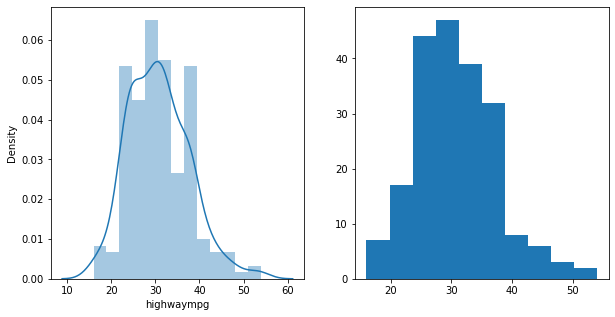

**************************************************
2. carwidth
count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64
Unique values carwidth :	 44
Median carwidth : 65.5
Mode carwidth : 63.8
Var carwidth : 4.601899569583934
Std carwidth : 2.145203852687183
Skew: 0.904003498786254
Kurtosis: 0.7027642441369477


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


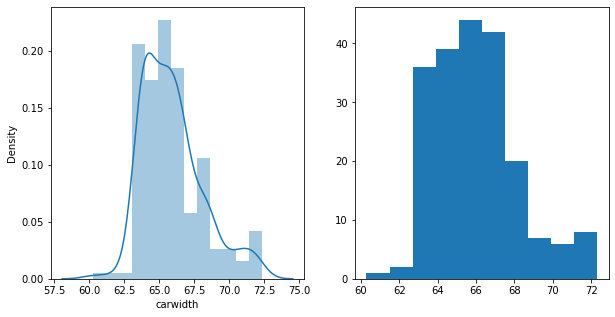

**************************************************
3. carlength
count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64
Unique values carlength :	 75
Median carlength : 173.2
Mode carlength : 157.3
Var carlength : 152.2086881874701
Std carlength : 12.33728852655518
Skew: 0.1559537713215604
Kurtosis: -0.08289485344758996


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


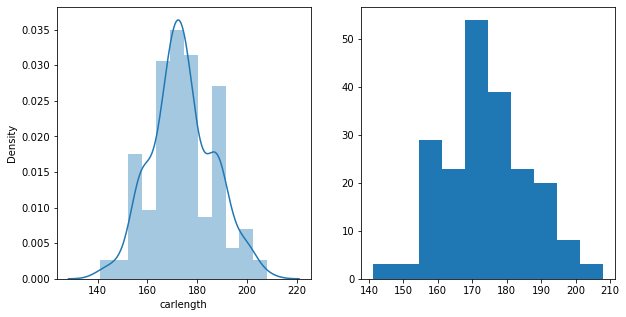

**************************************************
4. enginesize
count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64
Unique values enginesize :	 44
Median enginesize : 120.0
Mode enginesize : 92
Var enginesize : 1734.1139167862266
Std enginesize : 41.64269343817984
Skew: 1.9476550452788108
Kurtosis: 5.305682091703767


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


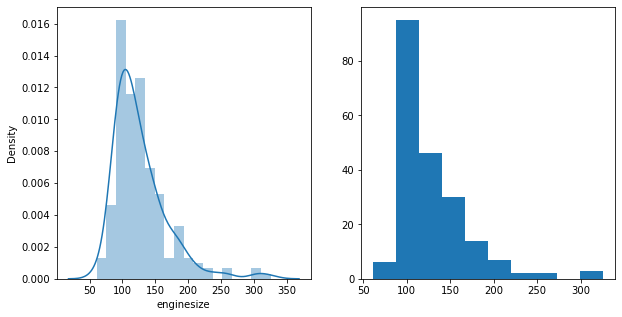

**************************************************
5. compressionratio
count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64
Unique values compressionratio :	 32
Median compressionratio : 9.0
Mode compressionratio : 9.0
Var compressionratio : 15.777104318507893
Std compressionratio : 3.972040321863298
Skew: 2.6108624576151533
Kurtosis: 5.233054347604856


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


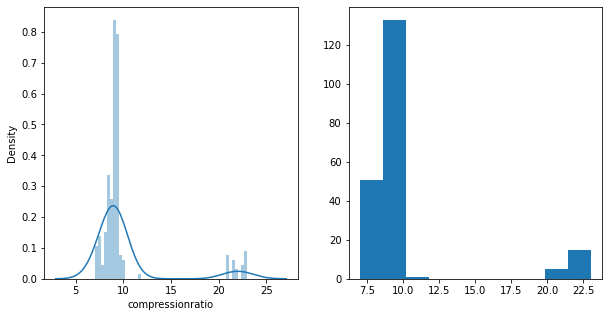

**************************************************
6. boreratio
count    205.000000
mean       3.329366
std        0.270858
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64
Unique values boreratio :	 38
Median boreratio : 3.31
Mode boreratio : 3.62
Var boreratio : 0.07336381157340986
Std boreratio : 0.27085754848888716
Skew: 0.02451054675818164
Kurtosis: -0.7853719335282325


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


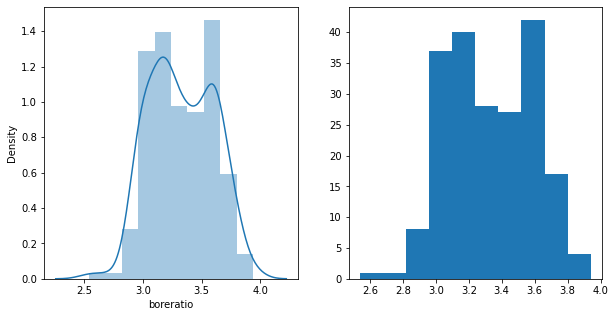

**************************************************
7. horsepower
count    205.000000
mean     104.165854
std       39.529733
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64
Unique values horsepower :	 59
Median horsepower : 95.0
Mode horsepower : 68.0
Var horsepower : 1562.5998087039693
Std horsepower : 39.52973322328358
Skew: 1.4034410293210586
Kurtosis: 2.6851678341770646


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


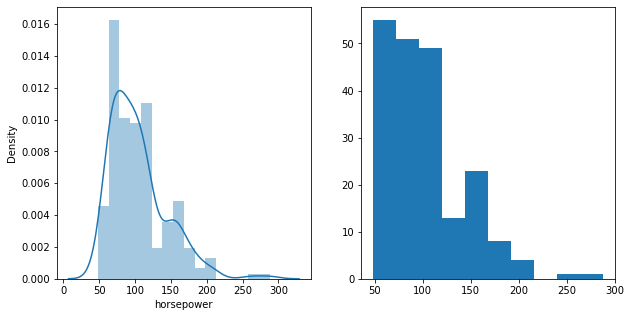

**************************************************
8. symboling
count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: symboling, dtype: float64
Unique values symboling :	 51
Median symboling : 115.0
Mode symboling : 115.0
Var symboling : 1011.5647058823528
Std symboling : 31.80510502863263
Skew: 0.9761135438633949
Kurtosis: 1.499388342847745


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


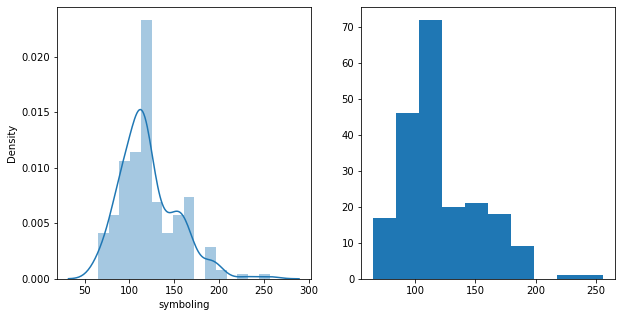

**************************************************
9. wheelbase
count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64
Unique values wheelbase :	 53
Median wheelbase : 97.0
Mode wheelbase : 94.5
Var wheelbase : 36.261782400765185
Std wheelbase : 6.021775685025571
Skew: 1.0502137758714858
Kurtosis: 1.0170389463774234


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


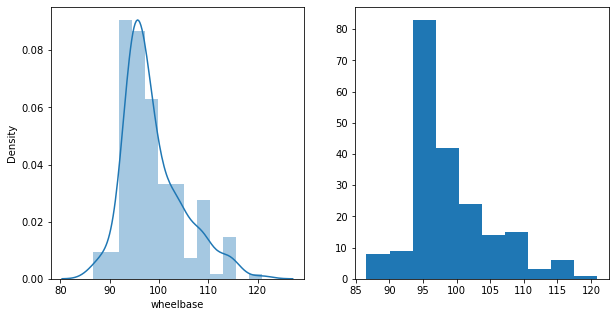

**************************************************
10. stroke
count    205.000000
mean       3.256098
std        0.313634
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64
Unique values stroke :	 36
Median stroke : 3.29
Mode stroke : 3.4
Var stroke : 0.09836606886657105
Std stroke : 0.313633653912604
Skew: -0.6960331002094712
Kurtosis: 2.178114110104682


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


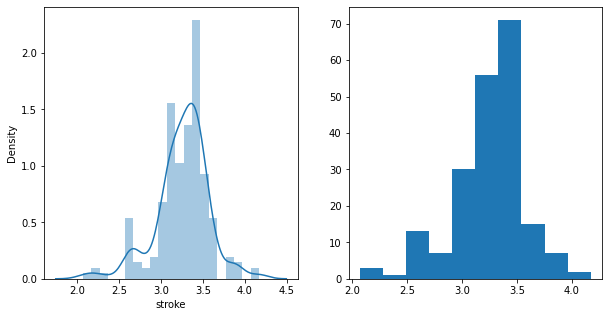

**************************************************
11. curbweight
count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64
Unique values curbweight :	 171
Median curbweight : 2414.0
Mode curbweight : 2385
Var curbweight : 271107.8743185079
Std curbweight : 520.6802035016387
Skew: 0.681398189052588
Kurtosis: -0.04285376609990976


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


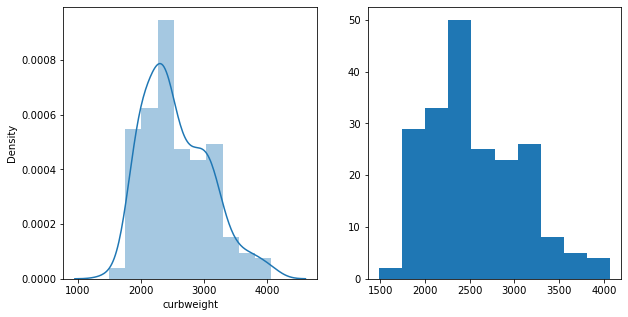

**************************************************
12. peakrpm
count     205.000000
mean     5126.097561
std       477.035772
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64
Unique values peakrpm :	 23
Median peakrpm : 5200.0
Mode peakrpm : 5500.0
Var peakrpm : 227563.12769010046
Std peakrpm : 477.03577191873194
Skew: 0.0689788586334687
Kurtosis: 0.08484457282118818


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


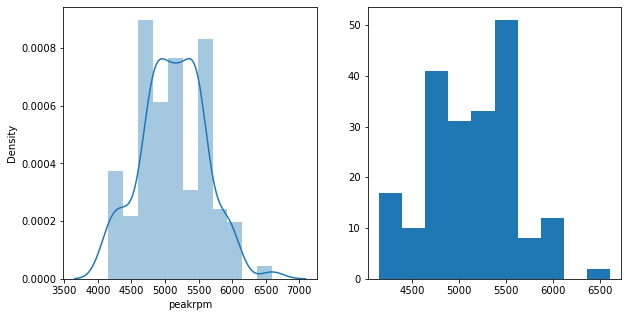

**************************************************
13. carheight
count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64
Unique values carheight :	 49
Median carheight : 54.1
Mode carheight : 50.8
Var carheight : 5.97079961740794
Std carheight : 2.4435219699049036
Skew: 0.06312273247192804
Kurtosis: -0.4438123650575503


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


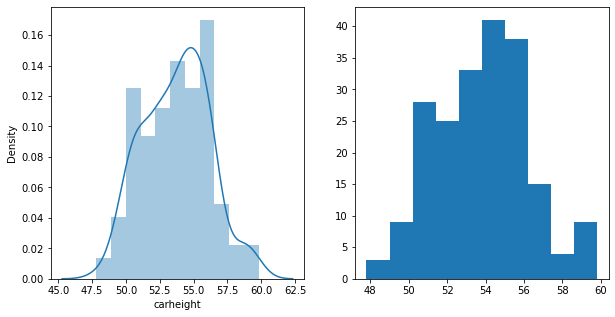

**************************************************
14. citympg
count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64
Unique values citympg :	 29
Median citympg : 24.0
Mode citympg : 31
Var citympg : 42.79961740793879
Std citympg : 6.542141653001622
Skew: 0.6637040288148164
Kurtosis: 0.5786483404849747


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


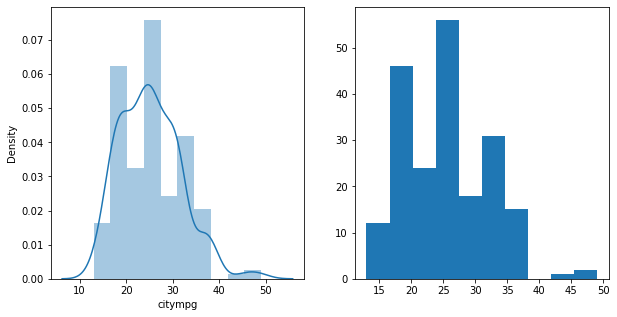

**************************************************
15. price
count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64
Unique values price :	 186
Median price : 10295.0
Mode price : 10295.0
Var price : 62080552.87077952
Std price : 7879.121326060383
Skew: 1.8409793088634683
Kurtosis: 3.374863565224175


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


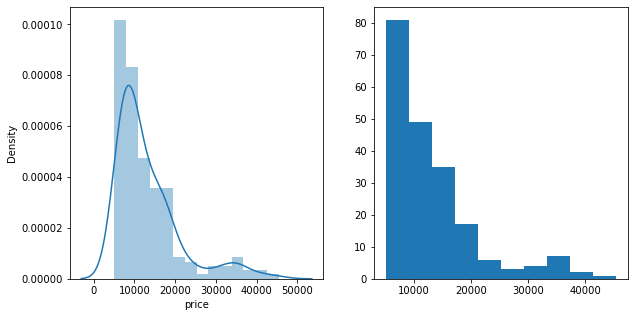

**************************************************


In [30]:
c = 1
for i in lst_numeric:
    print(f'{c}. {i}')
    Univariate_Analysis(i,df)
    print('*'*50)
    c+=1

In [31]:
df.shape # Cỡ mẫu quá nhỏ không remove Outlier gì cả !!!

(205, 26)

# Multivariate Analysis
#### *Phân tích 2 biến Categorical

In [32]:
lst_object_ # List categorical
lst_numeric # list numeric

['highwaympg',
 'carwidth',
 'carlength',
 'enginesize',
 'compressionratio',
 'boreratio',
 'horsepower',
 'symboling',
 'wheelbase',
 'stroke',
 'curbweight',
 'peakrpm',
 'carheight',
 'citympg',
 'price']

In [33]:
def Chi2(x,y,df):
    # Input & Input have to Independent (2 biến đầu vô phải độc lập)
#     print(i,'.',x,'&',y)
    table = pd.crosstab(df[x],df[y])
    stat,p,dof,expected = chi2_contingency(table)
    print('dof=%d' %dof)
    # print(f'expected = {expected}')
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    print(f'p_value={p}, critical={critical}, stat={stat}')
    alpha = 1 - prob
    if p <= alpha:
        print('Dependent (reject H0)') # Có sự khác biệt giữa Observed & Expected -> 2 nhóm có quan hệ vs nhau
        print(f'Dependent between {x} and {y} --> Bad')
    else:
        print('Independent (Fail to reject H0)')
        print(f'Independent 2 input features {x} and {y} --> Good')

In [34]:
# df[lst_object_].describe(include='all')

In [35]:
c=1
for i in range(len(lst_object_)-1):
    for j in range(i+1,len(lst_object_)):
        print(f'{c}. {lst_object_[i]} & {lst_object_[j]}')
        Chi2(lst_object_[i],lst_object_[j],df)
        c = c + 1
        print('*'*80)

1. CarName & fueltype
dof=21
p_value=0.0004949847774322942, critical=32.670573340917315, stat=49.04260548148416
Dependent (reject H0)
Dependent between CarName and fueltype --> Bad
********************************************************************************
2. CarName & aspiration
dof=21
p_value=6.105578502077662e-05, critical=32.670573340917315, stat=55.43590067306586
Dependent (reject H0)
Dependent between CarName and aspiration --> Bad
********************************************************************************
3. CarName & doornumber
dof=42
p_value=0.08336062188320206, critical=58.12403768086803, stat=55.195612973413695
Independent (Fail to reject H0)
Independent 2 input features CarName and doornumber --> Good
********************************************************************************
4. CarName & carbody
dof=84
p_value=2.9479641914726965e-07, critical=106.39484024272251, stat=165.3613667422097
Dependent (reject H0)
Dependent between CarName and carbody --> Bad
******

dof=14
p_value=0.0642664434881839, critical=23.684791304840576, stat=22.76129612853288
Independent (Fail to reject H0)
Independent 2 input features doornumber and fuelsystem --> Good
********************************************************************************
34. doornumber & car_ID
dof=10
p_value=3.569901820947718e-17, critical=18.307038053275146, stat=100.91760813815365
Dependent (reject H0)
Dependent between doornumber and car_ID --> Bad
********************************************************************************
35. carbody & drivewheel
dof=8
p_value=0.0008317943771481919, critical=15.50731305586545, stat=26.59036353905597
Dependent (reject H0)
Dependent between carbody and drivewheel --> Bad
********************************************************************************
36. carbody & enginelocation
dof=4
p_value=9.460793882389761e-09, critical=9.487729036781154, stat=43.187568756875685
Dependent (reject H0)
Dependent between carbody and enginelocation --> Bad
************

In [36]:
def ANOVA(x,y,df):
    lm = ols(f'{x} ~ C({y})',data=df[[x,y]].reset_index(drop=True)).fit()
    a = sm.stats.anova_lm(lm,typ=2)
#     print(a)
    return a

In [37]:
count = 0
c = True
while c == True:
    try:
        a = ANOVA('price','doornumber',df)
        print(a)
        if a['PR(>F)'].iloc[0] < 0.05:
            m_comp = pairwise_tukeyhsd(endog=df['doornumber'], groups=df['price'], alpha=0.05)
        print(m_comp)
        c = False
    except:
#         print(count,'Fail -> Continue')
        count = count + 1
        if count == 1:
            break

In [38]:
time = 1
for i in lst_object_[0:11]:
    print(f'{time}. {i} - ANOVA')
    a = ANOVA('price',i,df)
    print(a)
    print('*'*60)
    time+=1

1. CarName - ANOVA
                  sum_sq     df          F        PR(>F)
C(CarName)  9.678682e+09   21.0  28.248436  1.963969e-46
Residual    2.985751e+09  183.0        NaN           NaN
************************************************************
2. fueltype - ANOVA
                   sum_sq     df         F    PR(>F)
C(fueltype)  1.601105e+08    1.0  2.599296  0.108465
Residual     1.250432e+10  203.0       NaN       NaN
************************************************************
3. aspiration - ANOVA
                     sum_sq     df         F    PR(>F)
C(aspiration)  3.911573e+08    1.0  6.469743  0.011717
Residual       1.227328e+10  203.0       NaN       NaN
************************************************************
4. doornumber - ANOVA
                     sum_sq     df         F    PR(>F)
C(doornumber)  5.667279e+07    2.0  0.454002  0.635728
Residual       1.260776e+10  202.0       NaN       NaN
************************************************************
5. carbody - 

In [39]:
lst_cat_relationship = []
for i in lst_object_:
    a = ANOVA('price',i,df)
    if a['PR(>F)'].iloc[0] < 0.05:
        lst_cat_relationship.append(i)
lst_cat_relationship # ==> Các biến Categorical có liên quan đến 'Price'

['CarName',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_ID']

In [40]:
for i in lst_numeric:
    a = df[[i,'price']].corr()
    print(a)

            highwaympg     price
highwaympg    1.000000 -0.693037
price        -0.693037  1.000000
          carwidth     price
carwidth  1.000000  0.724558
price     0.724558  1.000000
           carlength     price
carlength   1.000000  0.686567
price       0.686567  1.000000
            enginesize     price
enginesize    1.000000  0.860343
price         0.860343  1.000000
                  compressionratio    price
compressionratio           1.00000  0.07289
price                      0.07289  1.00000
           boreratio     price
boreratio   1.000000  0.532861
price       0.532861  1.000000
            horsepower     price
horsepower    1.000000  0.749919
price         0.749919  1.000000
           symboling     price
symboling   1.000000  0.095489
price       0.095489  1.000000
           wheelbase     price
wheelbase   1.000000  0.584847
price       0.584847  1.000000
          stroke     price
stroke  1.000000  0.083627
price   0.083627  1.000000
            curbweight     pric

In [41]:
a = df[['wheelbase','price']].corr()
a['price'][0]

0.584846838972225

In [42]:
np.corrcoef(df['wheelbase'], df['price'])[0, 1]

0.5848468389722248

In [43]:
lst_num_relationship = []
for i in lst_numeric:
    a = np.corrcoef(df[i], df['price'])[0, 1]
    if a > 0.6:
        lst_num_relationship.append(i)
lst_num_relationship

['carwidth', 'carlength', 'enginesize', 'horsepower', 'curbweight', 'price']

# *Build Model

In [44]:
vars_analysis = lst_cat_relationship+lst_num_relationship
vars_analysis

['CarName',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_ID',
 'carwidth',
 'carlength',
 'enginesize',
 'horsepower',
 'curbweight',
 'price']

In [45]:
df_ = df[vars_analysis]
df_.head()

,CarName,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_ID,carwidth,carlength,enginesize,horsepower,curbweight,price
0,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi,3,64.1,168.8,130,111.0,2548,13495.0
1,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi,3,64.1,168.8,130,111.0,2548,16500.0
2,alfa-romero,std,hatchback,rwd,front,ohcv,six,mpfi,1,65.5,171.2,152,154.0,2823,16500.0
3,audi,std,sedan,fwd,front,ohc,four,mpfi,2,66.2,176.6,109,102.0,2337,13950.0
4,audi,std,sedan,4wd,front,ohc,five,mpfi,2,66.4,176.6,136,115.0,2824,17450.0


In [46]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [47]:
df_['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [48]:
lst_cat_relationship

['CarName',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_ID']

In [49]:
df_ = dummies('CarName',df_)
df_ = dummies('aspiration',df_)
df_ = dummies('carbody',df_)
df_ = dummies('drivewheel',df_)
df_ = dummies('enginelocation',df_)
df_ = dummies('enginetype',df_)
df_ = dummies('cylindernumber',df_)
df_ = dummies('fuelsystem',df_)

In [50]:
df_.head()

,car_ID,carwidth,carlength,enginesize,horsepower,curbweight,price,audi,bmw,chevrolet,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,64.1,168.8,130,111.0,2548,13495.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,64.1,168.8,130,111.0,2548,16500.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,65.5,171.2,152,154.0,2823,16500.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,66.2,176.6,109,102.0,2337,13950.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,66.4,176.6,136,115.0,2824,17450.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df_.columns

Index(['car_ID', 'carwidth', 'carlength', 'enginesize', 'horsepower',
       'curbweight', 'price', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [52]:
df_.columns

Index(['car_ID', 'carwidth', 'carlength', 'enginesize', 'horsepower',
       'curbweight', 'price', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
df_train.head()

,car_ID,carwidth,carlength,enginesize,horsepower,curbweight,price,audi,bmw,chevrolet,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,63.8,167.3,98,68.0,2191,7609.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125,3,68.3,168.9,151,143.0,2778,22018.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
166,1,64.0,168.7,98,112.0,2300,9538.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,64.1,168.8,130,111.0,2548,16500.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199,-1,67.2,188.8,130,162.0,3157,18950.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
vars_analysis

['CarName',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_ID',
 'carwidth',
 'carlength',
 'enginesize',
 'horsepower',
 'curbweight',
 'price']

In [56]:
df_train.columns

Index(['car_ID', 'carwidth', 'carlength', 'enginesize', 'horsepower',
       'curbweight', 'price', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['curbweight', 'enginesize', 'horsepower','carlength','carwidth','price']
# num_vars = vars_analysis
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [61]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
X_train
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64

In [64]:
# X_train.columns

In [65]:
# X_train = X_train.drop(['fueltype','doornumber'],axis=1)
X_train

,car_ID,carwidth,carlength,enginesize,horsepower,curbweight,audi,bmw,chevrolet,dodge,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,0.291667,0.426016,0.139623,0.083333,0.272692,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125,3,0.666667,0.452033,0.339623,0.395833,0.500388,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
166,1,0.308333,0.448780,0.139623,0.266667,0.314973,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,0.316667,0.450407,0.260377,0.262500,0.411171,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199,-1,0.575000,0.775610,0.260377,0.475000,0.647401,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,0.425000,0.508943,0.184906,0.283333,0.354926,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
103,0,0.516667,0.707317,0.452830,0.433333,0.609775,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
67,-1,0.833333,0.809756,0.460377,0.312500,0.786268,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24,1,0.291667,0.263415,0.109434,0.083333,0.185803,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [66]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# rfe = RFE(lm, 10)
# rfe = rfe.fit(X_train, y_train)

LinearRegression()

In [67]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [68]:
X = X_train
y = y_train
X = sm.add_constant(X) #Adding the constant
lm = sm.OLS(y,X).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.03e-44
Time:                        18:29:39   Log-Likelihood:                 236.37
No. Observations:                 143   AIC:                            -374.7
Df Residuals:                      94   BIC:                            -229.6
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1729      0.131      1.318

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [69]:
lm = sm.OLS(y_train,X_train).fit()
y_train_price = lm.predict(X_train)

In [70]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [71]:
y_test = df_test.pop('price')
X_test = df_test

In [72]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new = X_test_new.drop('const',axis=1)

In [73]:
# X_test_new

In [74]:
print(X_test_new.columns)
X_train.columns

Index(['car_ID', 'carwidth', 'carlength', 'enginesize', 'horsepower',
       'curbweight', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan',
       'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')


Index(['car_ID', 'carwidth', 'carlength', 'enginesize', 'horsepower',
       'curbweight', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan',
       'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [75]:
y_pred = lm.predict(X_test_new)

In [76]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.829975095349874